In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [21]:
data=pd.read_csv(r"C:\Users\ygz70\source\VSCodeProjects\UdemyDataScientistCourse\Datasets\loan_data_set.csv")
df=data.copy()

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
df.drop("Loan_ID",axis=1,inplace=True)

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
avg_income=df["ApplicantIncome"].mean()
print(f"Avg Income: {avg_income}")

Avg Income: 5403.459283387622


The ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


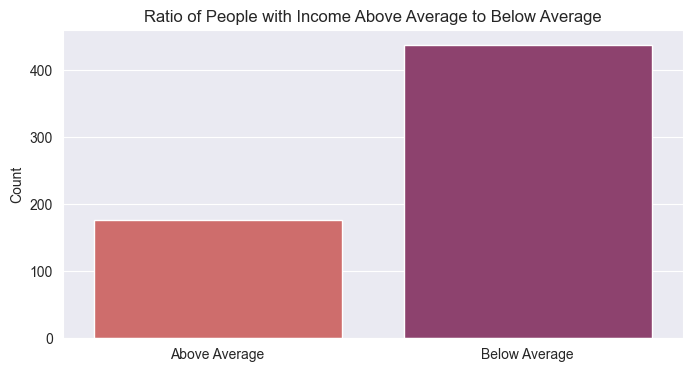

In [27]:
above_average_count = (df['ApplicantIncome'] > avg_income).sum()
below_average_count = (df['ApplicantIncome'] <= avg_income).sum()

ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

In [28]:
def showCountplot(i:list):
    for i in i:
        sns.countplot(x=df[i],data=df)
        plt.show()

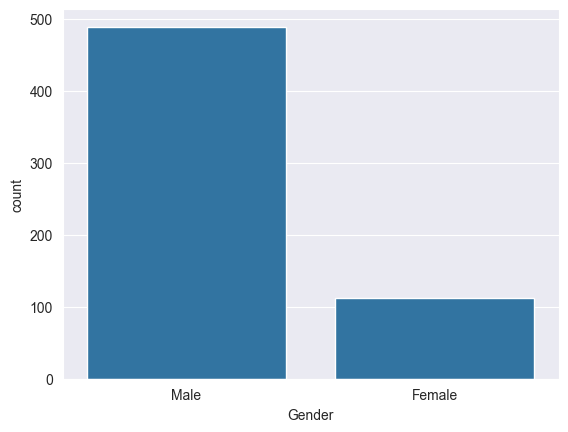

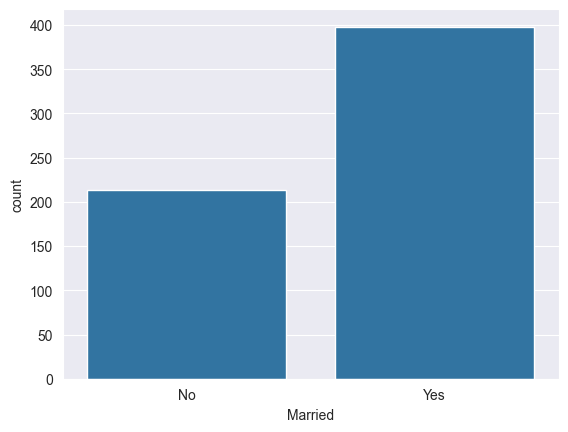

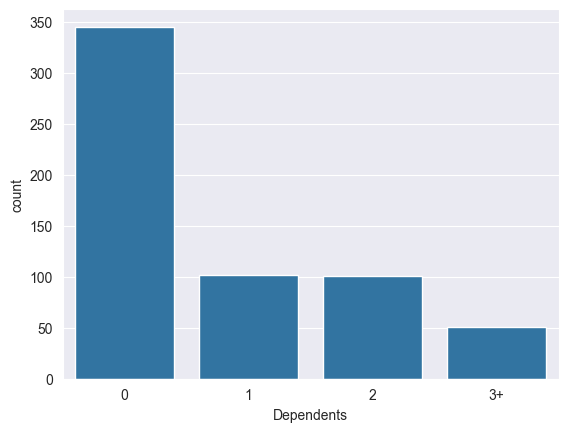

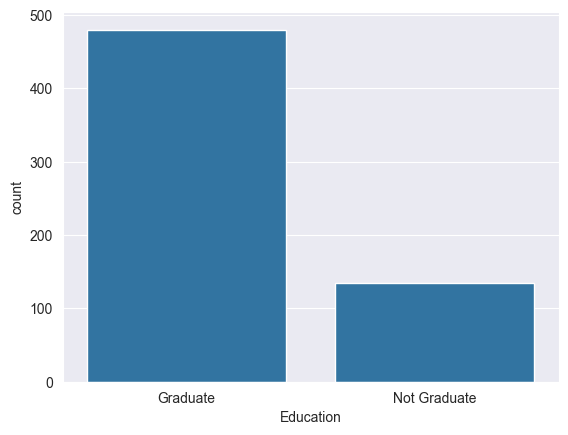

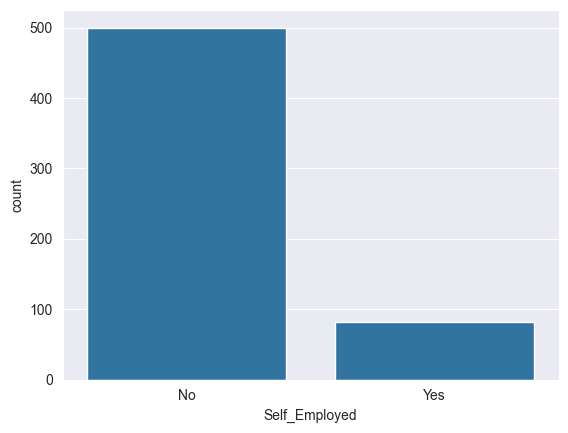

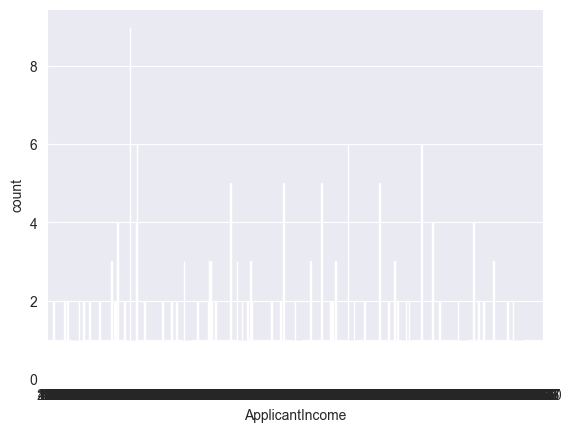

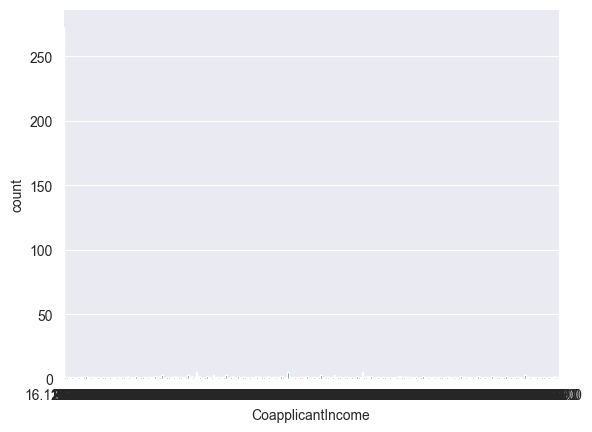

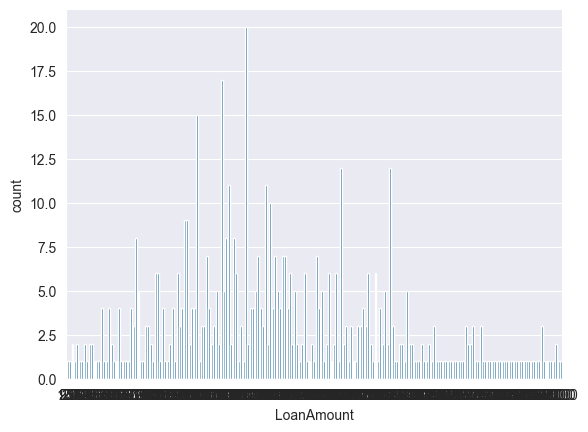

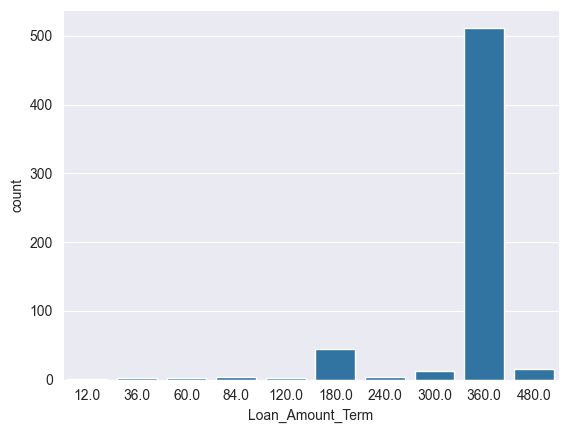

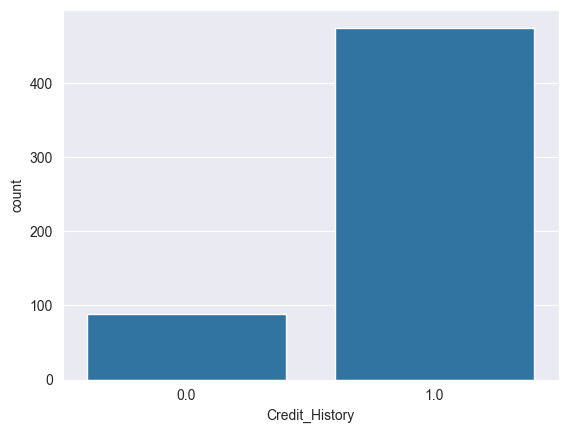

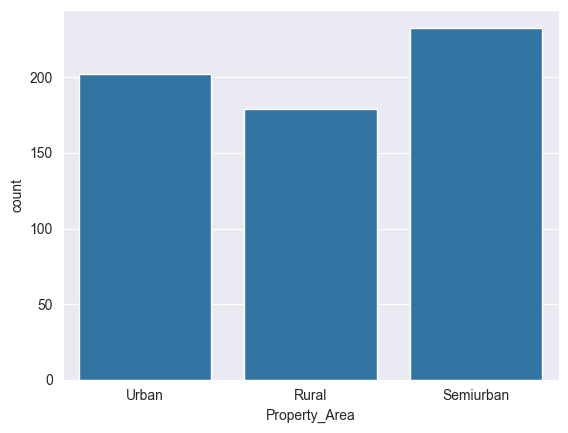

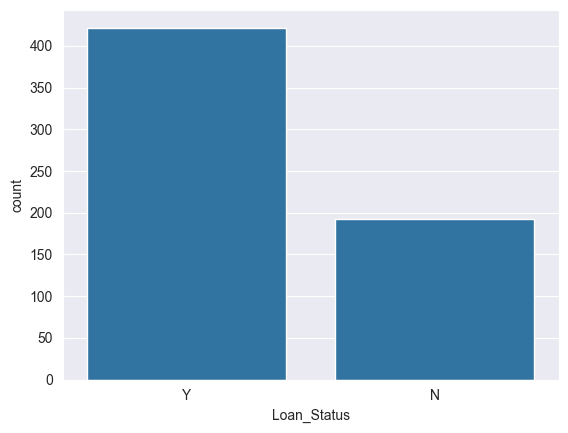

In [29]:
columns=df.columns
showCountplot(columns)

In [12]:
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

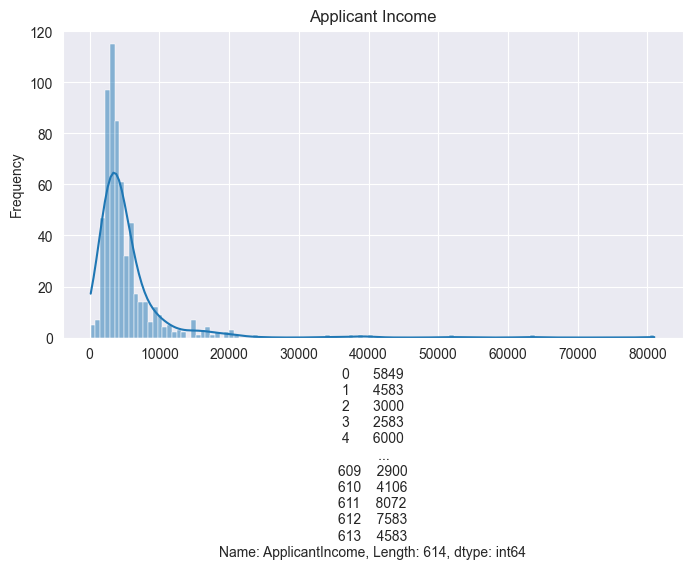

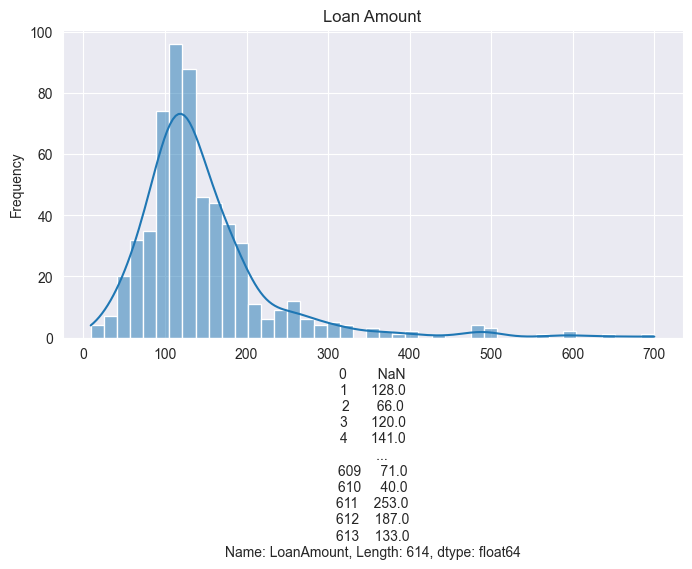

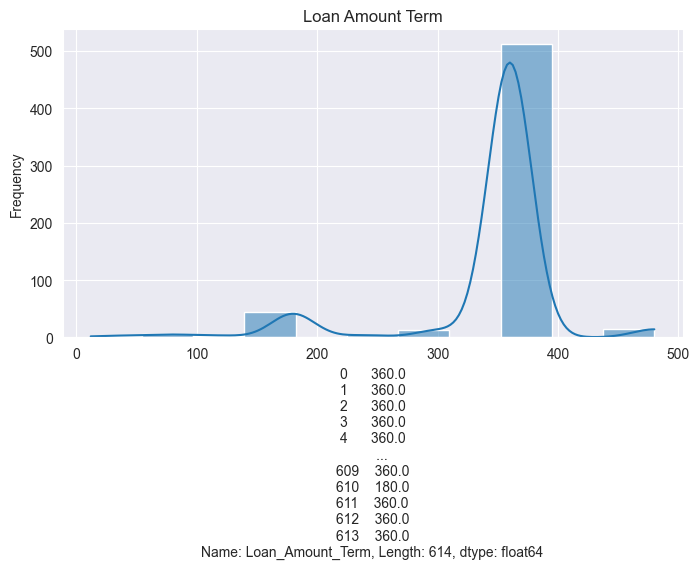

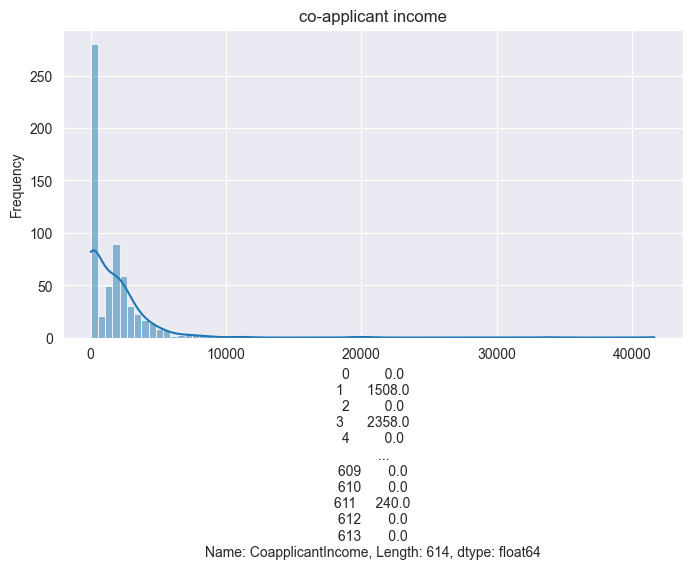

In [30]:
plot_distribution(df["ApplicantIncome"], 'Applicant Income')
plot_distribution(df["LoanAmount"], 'Loan Amount')
plot_distribution(df["Loan_Amount_Term"], 'Loan Amount Term')
plot_distribution(df["CoapplicantIncome"], 'co-applicant income')

Text(0.5, 1.0, 'Correlation Matrix')

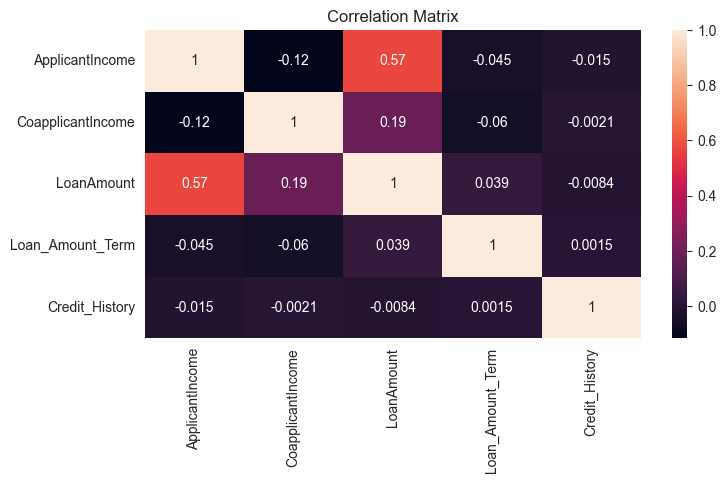

In [31]:
cm=df.corr(numeric_only=True)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True)
plt.title('Correlation Matrix')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [35]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [292]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [293]:
df=pd.get_dummies(df)
df = df.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1)

In [294]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [295]:
newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=newColunmsNames, inplace=True)
columns_name=df.columns.tolist()

In [296]:
for col in columns_name:
    print(f"column name: {col}")

column name: ApplicantIncome
column name: CoapplicantIncome
column name: LoanAmount
column name: Loan_Amount_Term
column name: Credit_History
column name: Gender
column name: Married
column name: Dependents_0
column name: Dependents_1
column name: Dependents_2
column name: Dependents_3+
column name: Education
column name: Self_Employed
column name: Property_Area_Rural
column name: Property_Area_Semiurban
column name: Property_Area_Urban
column name: Loan_Status


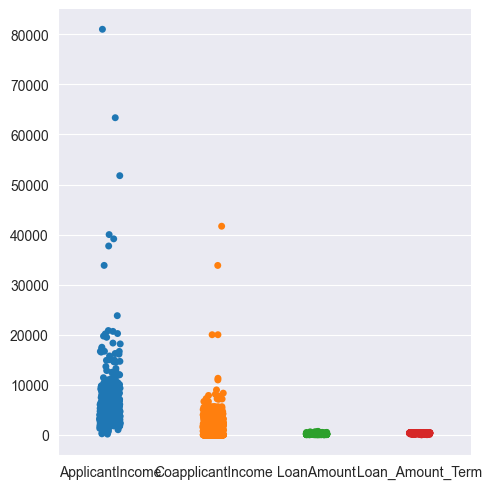

In [297]:
outliersColumns=df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])
sns.catplot(data=outliersColumns)

In [298]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
outlierFactors=lof.fit_predict(df)

In [299]:
np.where(outlierFactors==-1)

(array([  9,  10,  12,  14,  28,  34,  58,  77, 104, 109, 122, 126, 128,
        135, 148, 149, 155, 171, 174, 177, 183, 185, 188, 216, 253, 333,
        334, 336, 354, 369, 372, 375, 395, 402, 409, 417, 418, 423, 441,
        443, 444, 468, 500, 506, 513, 523, 530, 538, 544, 575, 581, 596,
        600], dtype=int64),)

In [300]:
df.drop(np.where(outlierFactors==-1)[0], axis=0, inplace=True)

In [301]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,120.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [303]:
X=df.drop(["Loan_Status"], axis=1)
y=df["Loan_Status"]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,True,False,False,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,False,True,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True


In [304]:
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (561, 16)
Shape of y: (561,)


In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
print("Shape of X:",X.shape)

Shape of X: (561, 16)


In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)


Shape of X_train: (448, 16)
Shape of y_train: (448,)
Shape of X_test: (113, 16)
Shape of y_test: (113,)


In [307]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier Model
from sklearn.neighbors import KNeighborsClassifier # For K-Nearest Neighbors Model
from sklearn.naive_bayes import GaussianNB,BernoulliNB  # For Gaussian,Bernoulli Naive Bayes Classifier Model
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression  


In [308]:
scoreListDT_Train = []
scoreListDT_Test = []


for i in range(1, 20):

    for j in range(1, 5):

        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)


        Model1.fit(X_train, y_train)


        scoreListDT_Train.append(Model1.score(X_train, y_train))


        scoreListDT_Test.append(Model1.score(X_test, y_test))

DT_Accuracy_Train = max(scoreListDT_Train) 
DT_Accuracy_Test = max(scoreListDT_Test)

print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 84.07%


In [309]:
scoreListRF_Train = []
scoreListRF_Test = []

'''
max_dep      ----------> (1, 5),(1, 10) 
rand_state   ----------> (1, 35),(1, 50)
n_est        ----------> (1, 30),(1, 30)
'''


for max_dep in range(1, 10):

    for rand_state in range(1, 50):

        for n_est in range(1, 30):

            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            

            Model2.fit(X_train, y_train)
            
            scoreListRF_Train.append(Model2.score(X_train, y_train))
            
            scoreListRF_Test.append(Model2.score(X_test, y_test))

RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

# Print the best accuracies achieved
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

Random Forest best accuracy (Training): 94.20%
Random Forest best accuracy (Testing): 85.84%


In [310]:
scoreListGNB_Train = []
scoreListGNB_Test = []


for i in range(1, 9):

    Model3_1 = GaussianNB(var_smoothing=10**(-i))


    Model3_1.fit(X_train, y_train)
    
    scoreListGNB_Train.append(Model3_1.score(X_train, y_train))
    
    scoreListGNB_Test.append(Model3_1.score(X_test, y_test))

GNB_Accuracy_Train = max(scoreListGNB_Train) 
GNB_Accuracy_Test = max(scoreListGNB_Test)

print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

Gaussian Naive Bayes best accuracy (Training): 82.37%
Gaussian Naive Bayes best accuracy (Testing): 83.19%


In [311]:
Model3_2= BernoulliNB()


Model3_2.fit(X_train, y_train)
    
BNB_Accuracy_Train = Model3_2.score(X_train, y_train)
    
BNB_Accuracy_Test = Model3_2.score(X_test, y_test)

print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%") 

Bernoulli Naive Bayes best accuracy (Training): 82.59%
Bernoulli Naive Bayes best accuracy (Testing): 82.30%


In [312]:
scoreListLR_Train = []
scoreListLR_Test = []


for i in range(1, 150):

    for j in range(1, 10):

        Model4= LogisticRegression(random_state=i, solver='saga', max_iter=j)

        Model4.fit(X_train,y_train)

        scoreListLR_Train.append(Model4.score(X_train, y_train))

        scoreListLR_Test.append(Model4.score(X_test, y_test))
        
LR_Accuracy_Train = max(scoreListLR_Train) 
LR_Accuracy_Test = max(scoreListLR_Test)
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train*100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test*100:.2f}%")

Logistic Regression best accuracy (Training): 82.59%
Logistic Regression best accuracy (Testing): 84.07%


In [313]:
Model5= RidgeClassifierCV()

Model5.fit(X_train,y_train)

RCCV_Accuracy_Train = Model5.score(X_train, y_train)
RCCV_Accuracy_Test = Model5.score(X_test, y_test)


print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")


Ridge Classifier CV best accuracy (Training): 82.14%
Ridge Classifier CV best accuracy (Testing): 83.19%


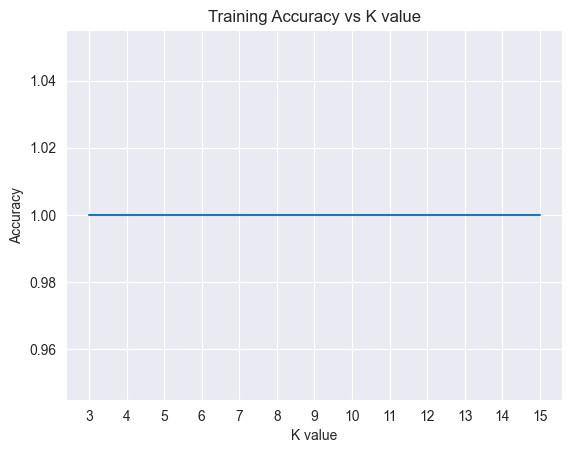

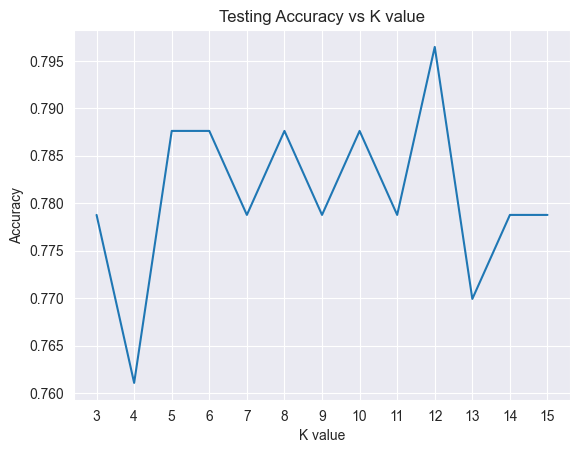

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 79.65%


In [314]:
scoreListknn_Train = []
scoreListknn_Test = []

for i in range(3, 16):
    Model6 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    Model6.fit(X_train, y_train)
    

    scoreListknn_Train.append(Model6.score(X_train, y_train))
    

    scoreListknn_Test.append(Model6.score(X_test, y_test))
    
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

KNN_Accuracy_Train = max(scoreListknn_Train) 
KNN_Accuracy_Test = max(scoreListknn_Test)

print(f"KNN best accuracy (Training): {KNN_Accuracy_Train*100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test*100:.2f}%")



In [315]:
model_train_score = {"Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
    "Model 3-GaussianNB": GNB_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-Logistic Regression": LR_Accuracy_Train,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Train
                     }

for model_name,accuary in model_train_score.items():
    print(f"{model_name}: {accuary}")

Model 1-Decision Tree Classifier: 1.0
Model 2-Random Forest Classifier: 0.9419642857142857
Model 3-GaussianNB: 0.8236607142857143
Model 3-BernoulliNB: 0.8258928571428571
Model 4-Logistic Regression: 0.8258928571428571
Model 5-Ridge Classifier CV: 0.8214285714285714
Model 6-K-Nearest Neighbors (KNN): 1.0


In [316]:
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
    "Model 3-GaussianNB": GNB_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-Logistic Regression": LR_Accuracy_Test,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Test
}

for model_name, accuracy in model_test_scores.items():
    print(f"{model_name:<50} Testing Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Testing Score: 84.070796460177
Model 2-Random Forest Classifier                   Testing Score: 85.84070796460178
Model 3-GaussianNB                                 Testing Score: 83.1858407079646
Model 3-BernoulliNB                                Testing Score: 82.30088495575221
Model 4-Logistic Regression                        Testing Score: 84.070796460177
Model 5-Ridge Classifier CV                        Testing Score: 83.1858407079646
Model 6-K-Nearest Neighbors (KNN)                  Testing Score: 79.64601769911505


In [317]:
y_pred=Model2.predict(X_test)

In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

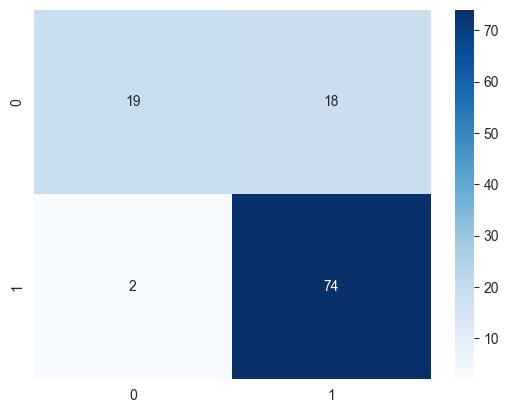

In [320]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [321]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,120.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [326]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
554,False,False
449,False,True
73,False,False
367,False,False
258,False,True
...,...,...
179,False,False
16,True,True
374,True,True
159,True,True
